In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.special import zetac
from mpmath import zeta 


In [3]:
def plot_loglog(ax, tot_clust):
    x = np.linspace(1, len(tot_clust), (len(tot_clust)))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, tot_clust)
    ax.plot(x, tot_clust, '+')

def plot_samplex(ax, clusters):
    list = np.zeros(len(clusters))
    for i in range(len(clusters)):
        list[i] = np.sum(clusters[i:])/np.sum(clusters)
    ax.set_xscale('log')
    ax.set_yscale('log')
    x = np.linspace(1, len(list), len(list))
    ax.plot(x, list)
    return x, list

def plot_ccdf1(ax, tot_clust):
    N = len(tot_clust)
    x = np.sort(tot_clust) 
    y = np.arange(N) / float(N)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, 1-y)

def plot_ccdf2(ax, tot_clust, dens=False):
    count, bins_count = np.histogram(tot_clust, bins=np.logspace(0, np.log10(len(tot_clust)), 5000), density=dens)
    pdf = count / sum(count) 
    cdf = np.cumsum(pdf)
    ccdf = 1 - cdf
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(bins_count[1:], ccdf)
    return bins_count[1:], ccdf

def pl(x, a, b):
    return a * np.power(x, -b)

def fit_pl(x, y):
    return scipy.optimize.curve_fit(power_law, x, y)

def alpha(amount, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/np.min(amount[xmin:xmax]))))
    sigma = (alpha - 1) / np.sqrt(len(amount[xmin:xmax]))
    return [alpha, sigma]



<font size= "7"> 2D Growth </font>


(0.001, 100)

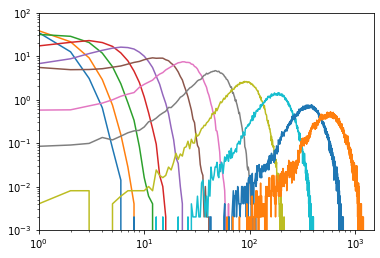

In [41]:
dens_list = ["0.028800", "0.050000", "0.100000", "0.200000", "0.400000", "0.800000", "1.600000", "3.200000", "6.400000", "12.800000", "25.600000", "40.000000"]
for i in dens_list:
    size, amount = np.loadtxt("2D_r3.000000_{}.txt".format(i), skiprows=1, unpack=True)
    amount = amount[1:]/500
    size = size[1:]
    plt.loglog(size, amount)
plt.xlim(1, 1500)    
plt.ylim(0.001, 100)

#de 40 hier bij overdensity moeten er af getrokken worden


<font size="7"> 3D Growth </font>

100000.0


Text(0.5, 1.0, 'Cluster size distribution r=5, Density=0.8')

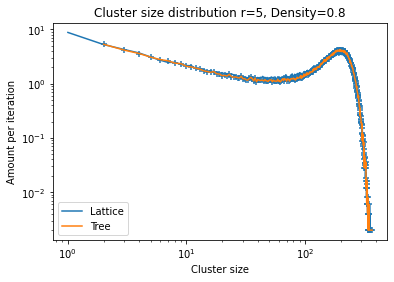

In [7]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="Lattice")


size, amount = np.loadtxt("test13D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
print(sum(amount*size)/500)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="Tree")
plt.scatter(size, amount, marker='+')

plt.legend(loc="lower left")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.title("Cluster size distribution: r=5, Density=0.8")




5.208514800400033
1.1668722232233881
------------------
4.420895838271569
1.2579896699351205
------------------
2.145190693665073
1.3051072925117342
------------------
1.6909484953396223
no tail


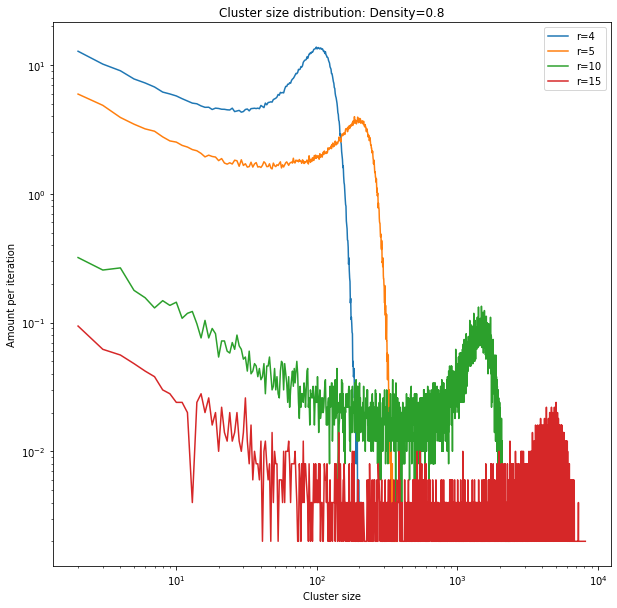

In [57]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_tree_r4.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=4")
print(alpha(amount, 1, 20))
print(alpha(amount, 100, 300))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=5")
print(alpha(amount, 1, 30))
print(alpha(amount, 250, 500))
print('------------------')


size, amount = np.loadtxt("Pref_growth/3D_tree_r10.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=10")
print(alpha(amount, 1, 50))
print(alpha(amount, 1080, 2000))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r15.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="r=15")
print(alpha(amount, 1, 100))
print('no tail')


plt.title("Cluster size distribution: Density=0.8")
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.legend()

14.943513894499635
1.2158905059723981
------------------
6.4787869246882455
1.2579896699351205
------------------
2.7943112152447735
1.2940496442940577


Text(0.5, 1.0, 'Cluster size distribution: r=5')

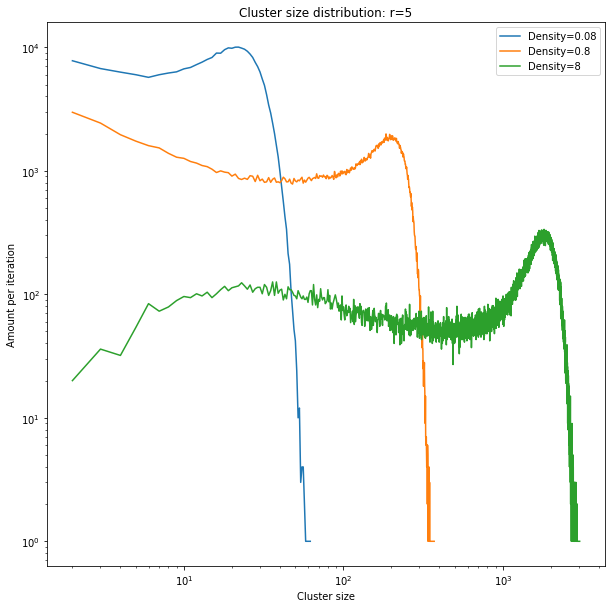

In [52]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_tree_r5.000000_0.080000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.08")
print(alpha(amount, 1, 6))
print(alpha(amount, 30, 100))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r5.000000_0.800000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=0.8")
print(alpha(amount, 1, 80))
print(alpha(amount, 250, 1000))
print('------------------')

size, amount = np.loadtxt("Pref_growth/3D_tree_r5.000000_8.000000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="Density=8")
print(alpha(amount, 30, 300))
print(alpha(amount, 2000, 3000))
plt.legend()
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.title("Cluster size distribution: r=5")

Text(0.5, 1.0, 'Cluster size distribution: r=6, Density=0.8')

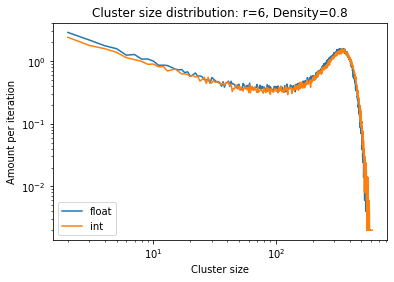

In [17]:
plt.figure(figsize=(10, 10))
size, amount = np.loadtxt("Pref_growth/3D_tree_r6.000000_0.800000_float.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_tree_r6.000000_0.800000_int.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]/500
plt.loglog(size, amount, label="int")

plt.legend()
plt.xlabel("Cluster size")
plt.ylabel("Amount per iteration")
plt.title("Cluster size distribution: r=6, Density=0.8")


<font size="7"> 3D Growth Keuze </font>

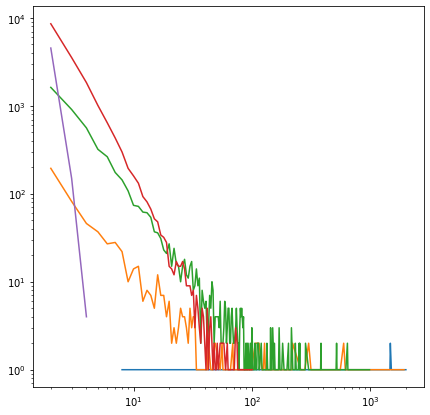

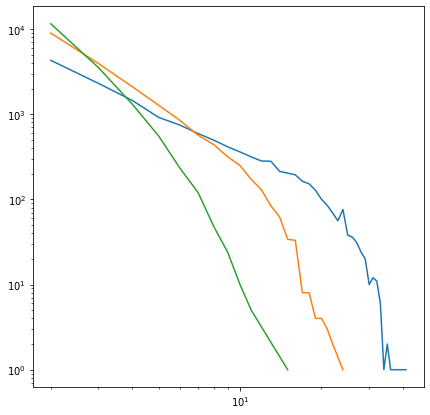

In [12]:
plt.figure(figsize=(7, 7))
size, amount = np.loadtxt("Pref_growth/3D_c0.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.01_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.10_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.5_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c1.0_r20.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")


plt.figure(figsize=(7, 7))

size, amount = np.loadtxt("Pref_growth/3D_c0.25_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.50_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")

size, amount = np.loadtxt("Pref_growth/3D_c0.75_r5.000000_0.100000.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="float")



<font size="7"> 3D Attach Gravity </font>

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


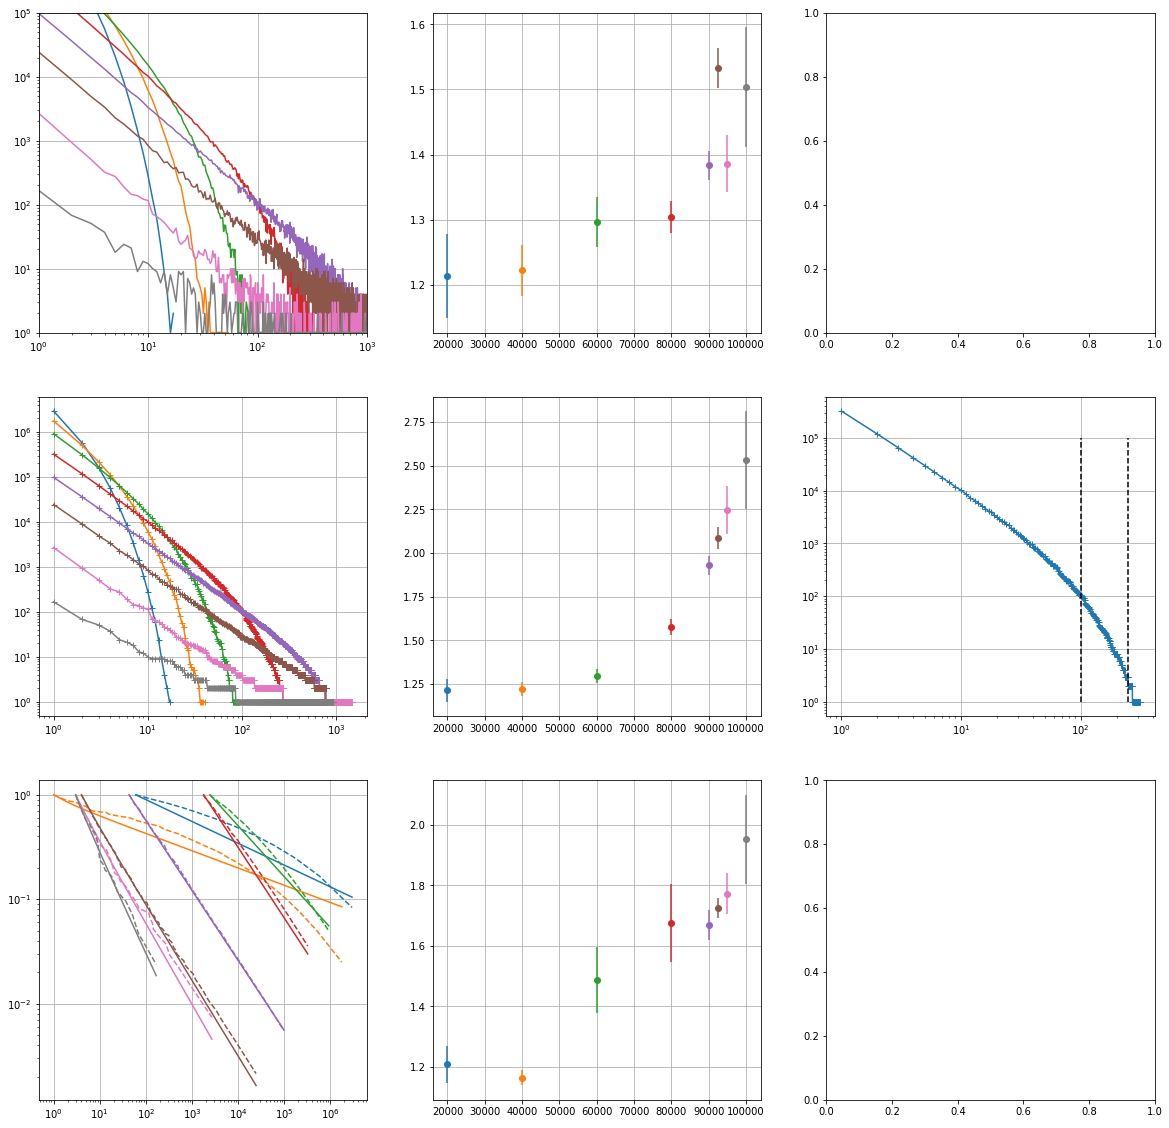

In [31]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
name = [20000, 40000, 60000, 80000, 90000, 92500, 95000, 100000]
lower_lim = [ 6,  8,  30, 100, 300, 300,  20, 10]
upper_lim = [19, 40, 100, 250, 600, 600, 100, 40] 

def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].plot(ranks, ccdf, marker='+')
    a, s = calc_alpha(ccdf, xmin, xmax)
    return [a, s]
    
def calc_alpha(amount, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    invSigma = np.sqrt(len(amount[xmin:xmax]) * ( (zeta(alpha, xmin, 2)/zeta(alpha, xmin)) - (zeta(alpha, xmin, 1)/zeta(alpha,xmin))**2 ))
    sigma = 1/invSigma
    return [alpha, sigma]

ax[0, 0].set_xlim(1, 1000)
ax[0, 0].set_ylim(1, 100000)
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[2, 0], linestyle='--', label="Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[2, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', c=cmap(i))

    out = calc_alpha(amount, lower_lim[i], upper_lim[i])
    out2 = plot_rank_frequency(amount, lower_lim[i], upper_lim[i])

    ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='o', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))


size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_80000_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ccdf = np.sort(amount)[::-1]
ranks = np.arange(1, len(ccdf)+1)
ax[1, 2].plot(ranks, ccdf, marker='+')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')

ax[1,2].grid()
ax[1,2].vlines(100, 1, 100000, linestyles='dashed', colors='k')
ax[1,2].vlines(250, 1, 100000, linestyles='dashed', colors='k')

Calculating best minimal value for power law fit
/home/sennevw/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


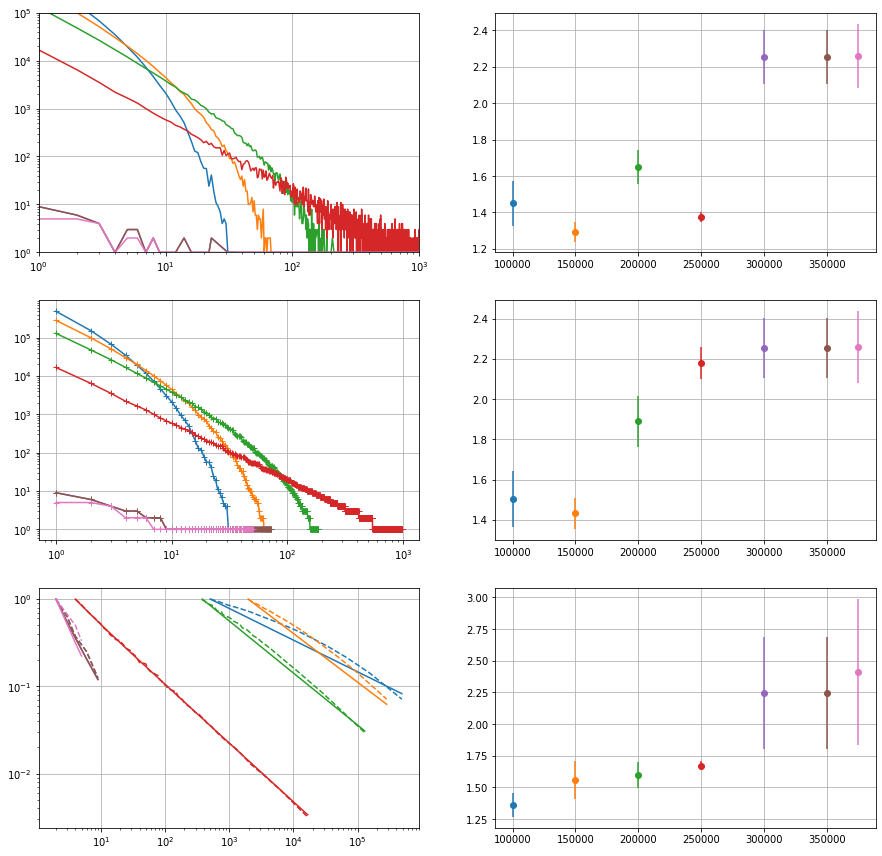

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
name = [100000, 150000, 200000, 250000, 300000, 350000, 375000]
lower_lim = [15, 30,  60, 80, 1, 1,  1, 1]
upper_lim = [28, 60, 110, 300, 600, 800, 200, 50] 


def plot_rank_frequency(amount, xmin, xmax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax[1, 0].plot(ranks, ccdf, marker='+')
    a, s = calc_alpha(ccdf, xmin, xmax)
    return [a, s]
    
def calc_alpha(amount, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/ (np.min(amount[xmin:xmax]) - 0.5))))
    sigma = (alpha - 1) / np.sqrt(len(amount[xmin:xmax]))
    return [alpha, sigma]

ax[0, 0].set_xlim(1, 1000)
ax[0, 0].set_ylim(1, 100000)
ax[0, 0].grid()
ax[0, 1].grid()
ax[1,0].grid()
ax[1,1].grid()
ax[2,0].grid()
ax[2,1].grid()

ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

cmap = plt.get_cmap('tab10')
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_{}_0.300000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]))

    result = powerlaw.Fit(amount, discrete=True)
    result.plot_ccdf(ax=ax[2, 0], linestyle='--', label="Time {}".format(name[i]), c=cmap(i))
    result.power_law.plot_ccdf(ax=ax[2, 0],  label="Time {}".format(name[i]), c=cmap(i))
    ax[2,1].errorbar(name[i], result.power_law.alpha, yerr=result.power_law.sigma, fmt='o', c=cmap(i))
    out = calc_alpha(amount, lower_lim[i], upper_lim[i])
    out2 = plot_rank_frequency(amount, lower_lim[i], upper_lim[i])

    ax[0,1].errorbar(name[i], out[0], yerr=out[1], fmt='o', c=cmap(i))
    ax[1,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))




60000.0
[1.9292312627883392, 0.029743967905880974]
[1.9292312627883392, 0.029743967905880974]
[1.1575700455765, 0.005043694251624816]


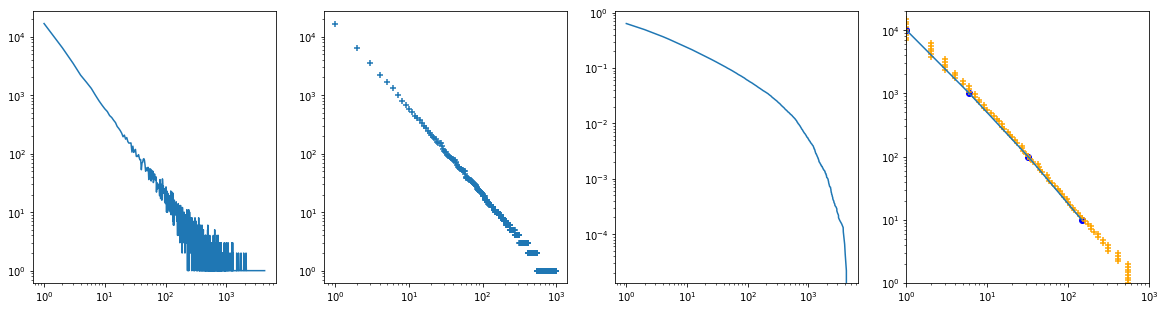

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_100_250000_0.300000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
ax[0].loglog(size, amount, label="int")
print(alpha(amount, 1, -1))

ccdf = np.sort(amount)[::-1]
ranks = np.arange(1, len(ccdf)+1)
print(alpha(ccdf, 1, -1))

ax[1].scatter(ranks, ccdf, marker='+')
ax[1].set_xscale('log')
ax[1].set_yscale('log')


cdf = np.cumsum(amount)/sum(amount)
ccdf = 1- cdf
print(alpha(ccdf, 1, -1))

ax[2].loglog(size, ccdf)

plot_size = int(np.log10(100000 *1000)) # factor adds OOM to the plots
plot_x = [0]*plot_size
plot_y = [0]*plot_size
plot_count = 0

# print(sum(sim_space)) # check
while plot_count < plot_size:
    plot_power = (10**(plot_count+1))
    plot_x[plot_count] = plot_power
    plot_y[plot_count] = len([i for i in amount if i > plot_power])
    plot_count+=1


ax[3].plot(plot_y, plot_x)
ax[3].scatter(plot_y, plot_x, color='blue', marker='o')
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xlim(1, 10**3)
ax[3].set_ylim(1, 2*10**4)

plot_size = np.logspace(0, np.log10(max(amount)), 100)
plot_x = [0]*len(plot_size)
plot_y = [0]*len(plot_size)
for i in range(len(plot_size)):
    plot_x[i] = plot_size[i]
    plot_y[i] = len([j for j in amount if j > plot_size[i]])
ax[3].scatter(plot_y, plot_x, marker='+', color='orange')



[1.2148555699103636, 0.04929124824716385]
[1.268115405060057, 0.02979060056222855]
[1.321421446672271, 0.022784962243256195]
[1.1996454197990374, 0.04842112667660062]
[1.365593209135036, 0.03170095164313063]
[1.4167697689099406, 0.029544025599592433]
[1.215560344429607, 0.022849350810882425]
[1.2834624513343873, 0.020094120407653723]
[1.5114610085163425, 0.036256509603184356]


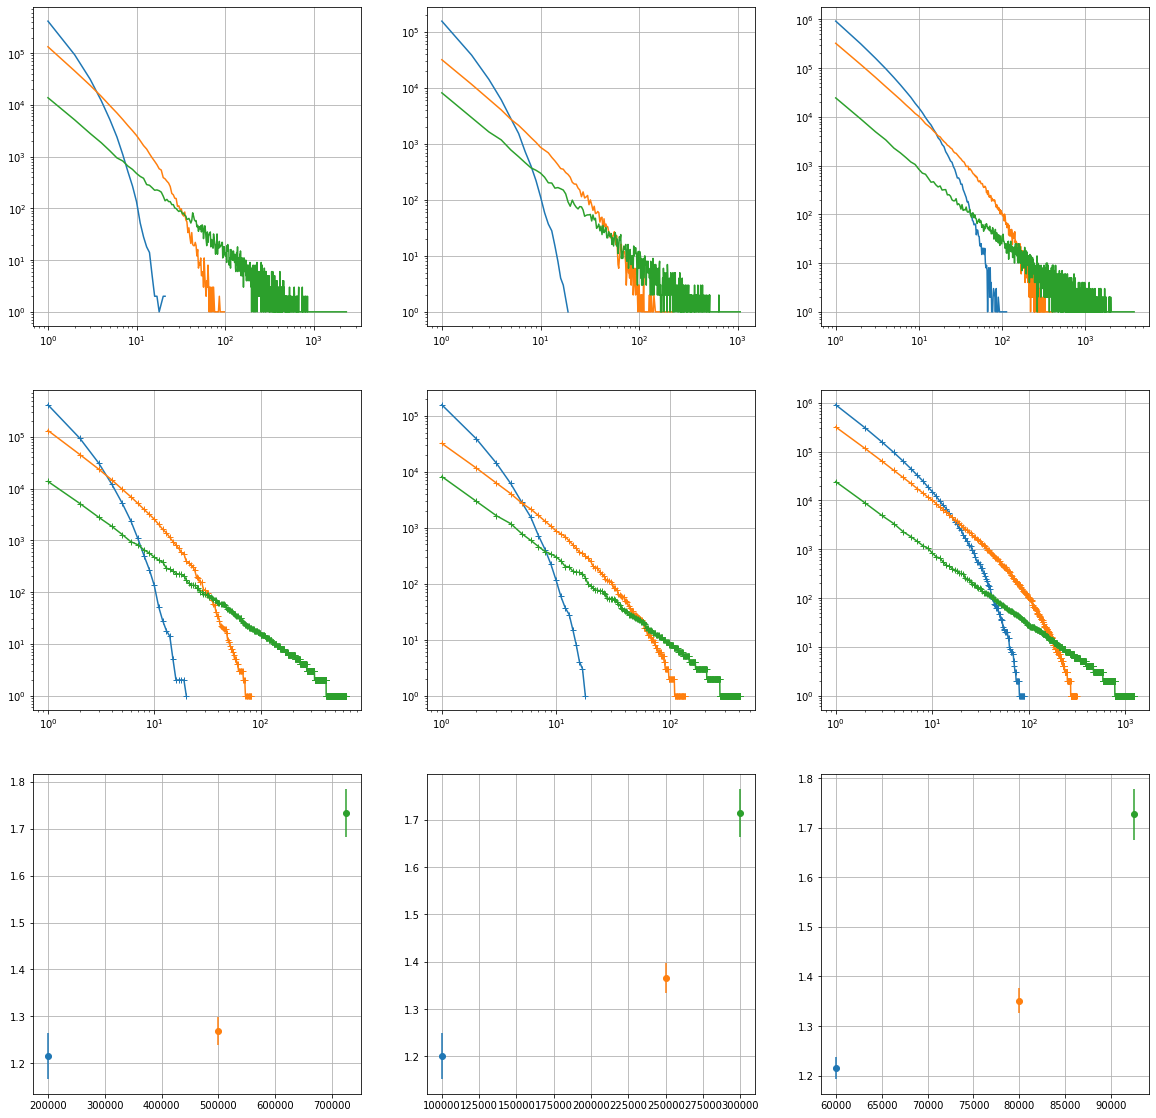

In [4]:

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].set_yscale('log')


ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 0].grid()
ax[0, 1].grid()
ax[0, 2].grid()
ax[1, 2].grid()
ax[2, 0].grid()
ax[2, 1].grid()
ax[2, 2].grid()

cmap = plt.get_cmap('tab10')    

def plot_rank_frequency(amount, xmin, xmax, ax):
    ccdf = np.sort(amount)[::-1]
    ranks = np.arange(1, len(ccdf)+1)
    ax.plot(ranks, ccdf, marker='+')
    a, s = calc_alpha(ccdf, xmin, xmax)
    return [a, s]
    
def calc_alpha(amount, xmin, xmax):
    alpha = 1 + len(amount[xmin:xmax]) / (np.sum(np.log(amount[xmin:xmax]/np.min(amount[xmin:xmax]))))
    sigma = (alpha - 1) / np.sqrt(len(amount[xmin:xmax]))
    return [alpha, sigma]

name = [200000, 500000, 725000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_200/r20_3D_200_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 0].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 0])
    ax[2,0].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))

name = [100000, 250000, 300000]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20_150/r20_3D_150_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 1].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 1])
    ax[2,1].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))


name = [60000, 80000, 92500]
for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/3D_r20/r20_3D_tree_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0, 2].loglog(size, amount, label="Time {}".format(name[i]), c=cmap(i))
    print(alpha(amount, 1, 200))
    out2 = plot_rank_frequency(amount, 1, 200, ax[1, 2])
    ax[2,2].errorbar(name[i], out2[0], yerr=out2[1], fmt='o', c=cmap(i))



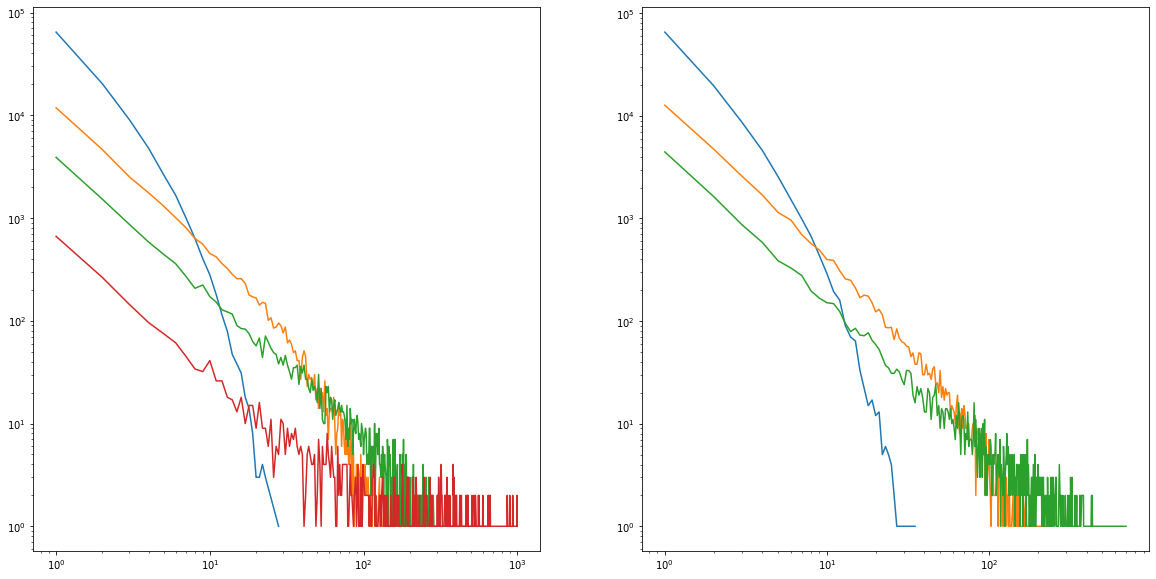

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
name = [427, 807, 902, 950]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/2D_r45/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[0].loglog(size, amount, label="Time {}".format(name[i]))

name = [427, 807, 902]

for i in range((len(name))):
    size, amount = np.loadtxt("Pref_attach/False/1 over r/r45_2D_100_{}_0.100000_0.txt".format(name[i]), skiprows=1, unpack=True)
    size = size[1:]
    amount = amount[1:]
    ax[1].loglog(size, amount, label="Time {}".format(name[i]))

<font size="7"> Frutsels </font>

100000.0
100000.0
100000.0


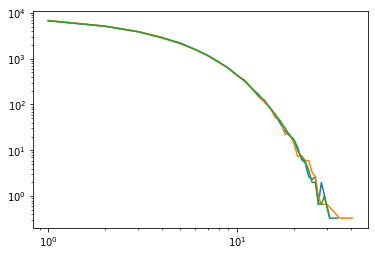

In [9]:
size, amount = np.loadtxt("Pref_attach/True/r6_3D_tree_100000_0.800000_1.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_attach/R6_PA_0.800000_100000.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")

size, amount = np.loadtxt("Pref_attach/r6_3D_tree_100000_0.800000_1.txt", skiprows=1, unpack=True)
print(sum(amount*size)/3)
size = size[1:]
amount = amount[1:]/3
plt.loglog(size, amount, label="int")


1000.0
1000.0
1000.0


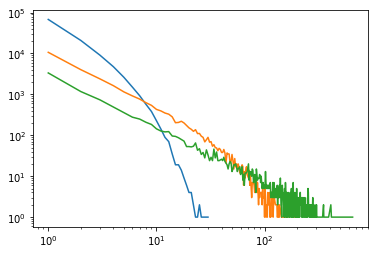

In [51]:

size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_405_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_810_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


size, amount = np.loadtxt("Pref_attach/False/r45_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/200)


1000.0
1000.0
1000.0
1000.0
1000.0
600.0


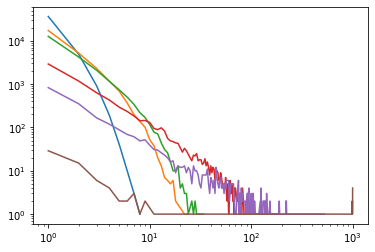

In [57]:
size, amount = np.loadtxt("Pref_attach/r99_2D_tree_100_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_400_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_500_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_800_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_900_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)

size, amount = np.loadtxt("Pref_attach/r99_2D_tree_950_0.100000_0.txt", skiprows=1, unpack=True)
size = size[1:]
amount = amount[1:]
plt.loglog(size, amount, label="int")
print(sum(amount*size)/50)


In [33]:
lijst = [1,2,3,4,5,6,7,8]
print(lijst[2:5])

[3, 4, 5]
